## 4.9 Data Visualization With Python

### This script includes the following points:

#### 1. Import the data
#### 2. Creating Bar Charts
#### 3. Creating Histograms
#### 4. Creating Scatterplot
#### 5. Sampling Data
#### 6. Creating line charts

### 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Poory\OneDrive\Desktop\project\Instacart Basket Analysis"

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_tsk48.pkl'))

In [15]:
ords_prods_merge

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Mid-range product,Regularly busy,Two Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,Mid-range product,Regularly busy,Two Least busy days,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Mid-range product,Least busy,Two Least busy days,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,Mid-range product,Least busy,Two Least busy days,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,...,Low-range product,Regularly busy,Regularly busy,Most Orders,31,Regular customer,6.905655,Low spender,8.0,Frequent customer
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,...,Low-range product,Regularly busy,Regularly busy,Most Orders,31,Regular customer,6.905655,Low spender,8.0,Frequent customer
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,...,Mid-range product,Regularly busy,Regularly busy,Average Orders,3,New customer,7.631579,Low spender,15.0,Regular customer
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,...,Mid-range product,Regularly busy,Two Least busy days,Fewest Orders,3,New customer,7.631579,Low spender,15.0,Regular customer


### 2. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

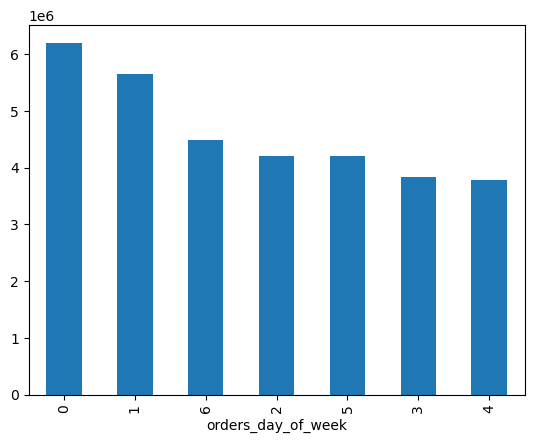

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

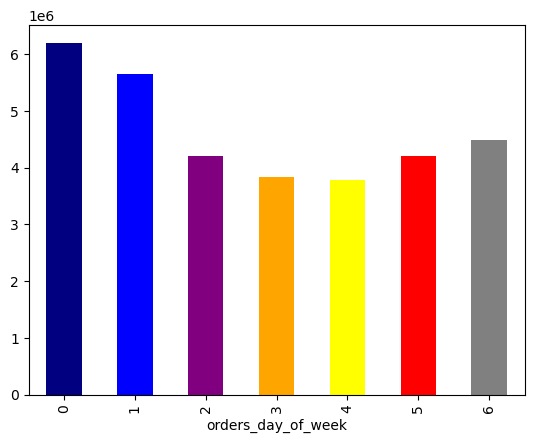

In [11]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['navy','blue', 'purple', 'orange', 'yellow', 'red', 'gray'])

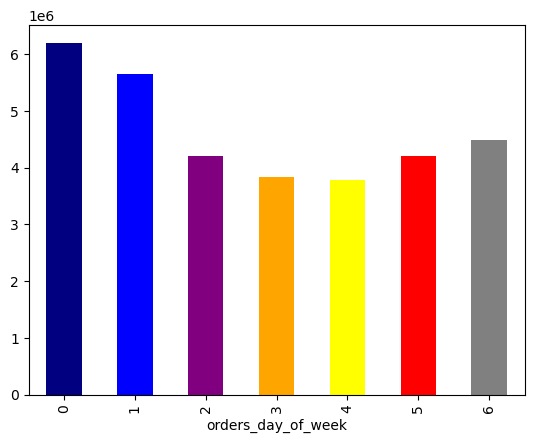

In [12]:
bar.figure

In [13]:
# Exporting Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 3. Creating Histograms

<Axes: ylabel='Frequency'>

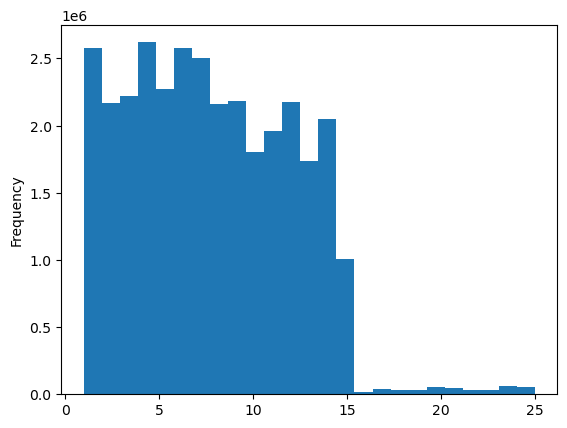

In [14]:
ords_prods_merge['prices'].plot.hist(bins = 25)

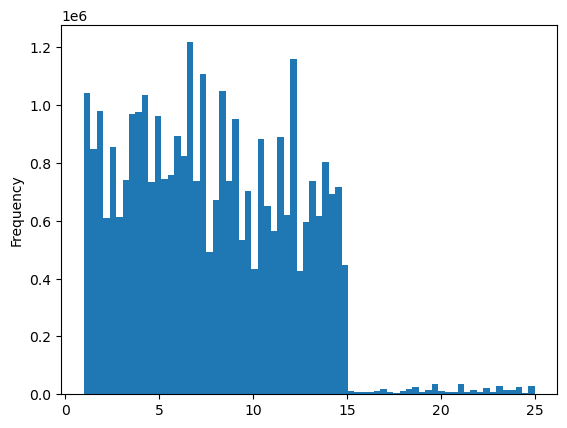

In [20]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

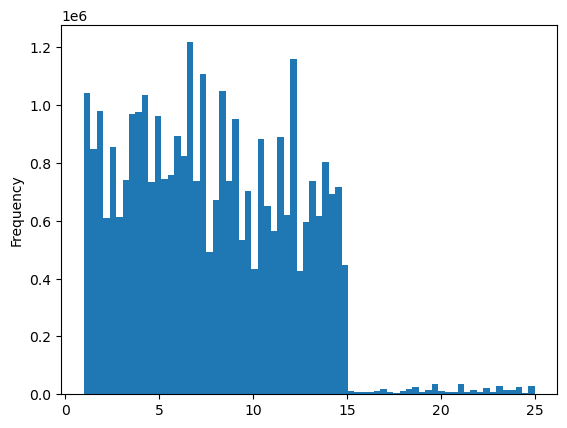

In [21]:
hist.figure

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### 4. Creating Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

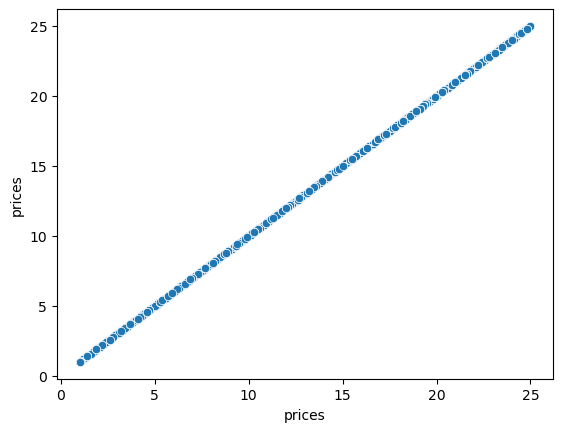

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,last_order_days,first_order,product_id,add_to_cart_order,reordered,...,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq_med,frequency_flag


### 5. Sampling Data

In [29]:
# creating a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [30]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# store 70 % of the sample in big data frame
big = ords_prods_merge[dev]

In [32]:
# store 30 % of the sample in small data frame
small = ords_prods_merge[~dev]

In [33]:
len(ords_prods_merge)

32404859

In [34]:
len(small) + len(big)

32404859

In [35]:
df_2 = small[['orders_day_of_week','prices']]

In [36]:
df_2

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


In [37]:
df_3 = big[['orders_day_of_week','prices']]
df_3

,orders_day_of_week,prices
1,3,9.0
4,4,9.0
5,2,9.0
7,1,9.0
8,1,9.0
...,...,...
32404854,2,3.7
32404855,5,3.7
32404856,2,6.9
32404857,3,6.9


### 6. Creating line charts

C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


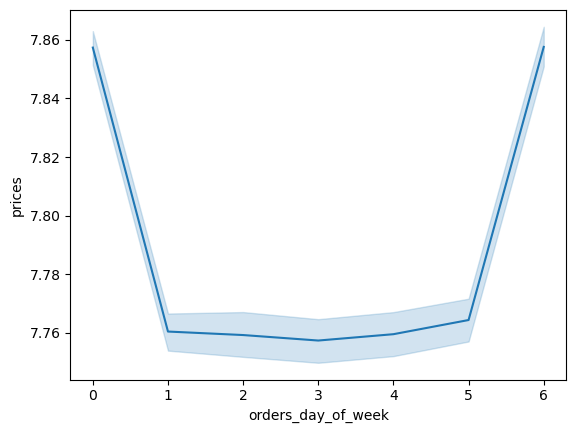

In [38]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [41]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_ord_dow.png'))